In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/lib/kaggle/gcp.py
/kaggle/input/fake-news-detection/true.csv
/kaggle/input/fake-news-detection/fake.csv


# Load the dataset

In [2]:
true = pd.read_csv('data/input/true.csv')

In [3]:
true.head(n=20)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [4]:
true.shape

(21417, 4)

In [5]:
fake = pd.read_csv('data/input/fake.csv')
fake.head(n=20)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [6]:
fake.shape

(23481, 4)

In [7]:
true['label'] = 1
fake['label'] = 0

In [8]:
filtered_fake = fake.loc[fake['date'].str.contains('2017')]
filtered_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
# Use the the first 5000 data of true and fake dataset for building the model.
frames = [true.loc[:100][:], fake.loc[:100][:]]

In [10]:
df = pd.concat(frames)

In [11]:
df.shape

(202, 5)

In [12]:
X = df. drop('label', axis=1)
y = df['label']

In [13]:
df = df.dropna()
df2 = df.copy()

In [14]:
df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# Data Preprocessing

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
ps = PorterStemmer()

In [16]:
corpus = []
after_lower_corpus = []
after_split_corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    after_lower_corpus.append(review)
    
    review = review.split()
    after_split_corpus.append(review)
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
print(after_lower_corpus[0])

washington  reuters    the head of a conservative republican faction in the u s  congress  who voted this month for a huge expansion of the national debt to pay for tax cuts  called himself a  fiscal conservative  on sunday and urged budget restraint in       in keeping with a sharp pivot under way among republicans  u s  representative mark meadows  speaking on cbs   face the nation   drew a hard line on federal spending  which lawmakers are bracing to do battle over in january  when they return from the holidays on wednesday  lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues  such as immigration policy  even as the november congressional election campaigns approach in which republicans will seek to keep control of congress  president donald trump and his republicans want a big budget increase in military spending  while democrats also want proportional increases for non defense  discretionary  spending on programs that support educati

In [18]:
print(after_split_corpus[0])

['washington', 'reuters', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'u', 's', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'u', 's', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues', 'such', 'as', 'immigration', 'policy', 'even', 'as', 'the', 'novem

In [19]:
# Setup BM25 ranger
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

class BM25(object):
    def __init__(self, b=0.75, k1=1.6):
        self.vectorizer = TfidfVectorizer(norm=None, smooth_idf=False)
        self.b = b
        self.k1 = k1

    def fit(self, X):
        """ Fit IDF to documents X """
        self.vectorizer.fit(X)
        y = super(TfidfVectorizer, self.vectorizer).transform(X)
        self.avdl = y.sum(1).mean()

    def transform(self, q, X):
        """ Calculate BM25 between query q and documents X """
        b, k1, avdl = self.b, self.k1, self.avdl

        # apply CountVectorizer
        X = super(TfidfVectorizer, self.vectorizer).transform(X)
        len_X = X.sum(1).A1
        q, = super(TfidfVectorizer, self.vectorizer).transform([q])
        assert sparse.isspmatrix_csr(q)

        # convert to csc for better column slicing
        X = X.tocsc()[:, q.indices]
        denom = X + (k1 * (1 - b + b * len_X / avdl))[:, None]
        # idf(t) = log [ n / df(t) ] + 1 in sklearn, so it need to be coneverted
        # to idf(t) = log [ n / df(t) ] with minus 1
        idf = self.vectorizer._tfidf.idf_[None, q.indices] - 1.
        numer = X.multiply(np.broadcast_to(idf, X.shape)) * (k1 + 1)                                                          
        return (numer / denom).sum(1).A1


In [20]:
# Range test dataset for train dataset
bm25 = BM25()
bm25.fit(corpus[1:])
scores = bm25.transform(corpus[0], corpus)
zip_array = sorted(zip(scores, corpus, [i for i in range(0, len(corpus))]), key=lambda x: x[0])
last_document_to_remove = int(len(zip_array)/10)
indices_to_keep = [x[2] for x in zip_array[last_document_to_remove:]]
shortened_corpus = [x[1] for x in zip_array[last_document_to_remove:]]
df2 = df2.iloc[indices_to_keep]
df2.head()

,index,title,text,subject,date,label
185,84,Trump Just Got His P*ssy Handed To Him By New...,Donald Trump bit off a bit more than he could ...,News,"November 17, 2017",0
169,68,Sean Hannity Gets Wrecked For Yelling At Time...,Fox News host Sean Hannity is having a Twitter...,News,"November 25, 2017",0
167,66,Trump: Everything You Heard Me Say On The Acc...,Former reality show star Donald Trump has repe...,News,"November 25, 2017",0
107,6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
142,41,‘Ghost Of Witness Flipped’: Hilarious SNL Ski...,"By now, everyone knows that disgraced National...",News,"December 3, 2017",0


In [21]:
print(shortened_corpus[:2])

['donald trump bit bit could chew attempt shoot venom new zealand newli elect prime minist jacinda ardern first person meet east asia summit last week trump told victori upset citizen countri hit back orang test shrivel instantli ladi caus lot upset countri trump reportedli told person stand next ardern promopt repli one march elect correct trump inaugur fail bring support march across nation opposit donald continu long elect ardern say trump laugh joke also reflect could taken particular way howev trump took abl complet tradit power handshak embarrass countri sinc elect ardern describ handshak standard mean trump tri yank arm socket per usual word conserv like use misus oh ye trump got cuck', 'fox news host sean hanniti twitter meltdown time call donald trump claim magazin call regard person year award declin offer time magazin correct trump tweet write presid incorrect choos person year time comment choic public decemb magazin call trump much bear trump cult member sean hanniti call 

In [22]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
print(tfidf_v)

TfidfVectorizer(max_features=5000, ngram_range=(1, 3))


In [23]:
X = tfidf_v.fit_transform(shortened_corpus).toarray()
y = df2['label']

In [24]:
print(X[-10:])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Model building - Naive Bayes Classifier
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [28]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print(len(X_test), len(pred))
print(pred)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

37 37
[0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0]
accuracy:   0.811


In [29]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,normalize=False,title='Матриця невідповідності',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Правдива класифікація')
    plt.xlabel('Очікувана класифікація')

Confusion matrix, without normalization


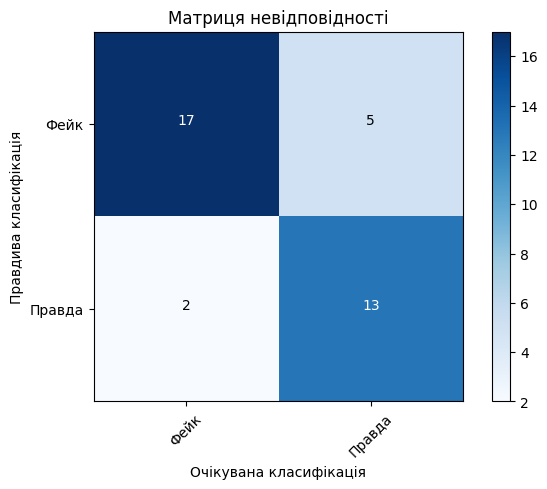

In [30]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Фейк', 'Правда'])

# Validate on an unseen datapoint

In [31]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'mani c word hillari compet one ouch'

In [32]:
val = tfidf_v.transform([review]).toarray()

In [33]:
classifier.predict(val)

array([0])

# Save model and vectorizer

In [34]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

# Load model and vectorizer to predict the previous datapoint

In [35]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
test_pred = joblib_model.predict(val_pkl)

if test_pred == 0:
    print("Fake News!")
else:
    print("Real News")

Fake News!


**Sample Run**

In [36]:
def preprocess_corpus(dataframe):
    corpus = []
    for i in range(0, len(dataframe)):
        review = re.sub('[^a-zA-Z]', ' ', dataframe['text'][i])
        review = review.lower()
        review = review.split()
    
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [37]:
def build_corpus(sample):
    frames = [true.loc[:sample][:], fake.loc[:sample][:]]
    dataframe = pd.concat(frames)
    X = dataframe.drop('label', axis=1)
    y = dataframe['label']
    dataframe.reset_index(inplace=True)
    corpus = preprocess_corpus(dataframe)
    
    bm25 = BM25()
    bm25.fit(corpus[1:])
    scores = bm25.transform(corpus[0], corpus)
    zip_array = sorted(zip(scores, corpus, [i for i in range(0, len(corpus))]), key=lambda x: x[0])
    last_document_to_remove = int(len(zip_array)/10)
    indices_to_keep = [x[2] for x in zip_array[last_document_to_remove:]]
    shortened_corpus = [x[1] for x in zip_array[last_document_to_remove:]]
    dataframe = dataframe.iloc[indices_to_keep]
    return (shortened_corpus, dataframe)

In [38]:
def run_with_sample(sample):
    shortened_corpus, dataframe = build_corpus(sample)
    X = tfidf_v.fit_transform(shortened_corpus).toarray()
    y = dataframe['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

In [ ]:
samples = [100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for sample in samples:
    run_with_sample(sample)

accuracy:   0.811
